In [1]:
import requests
import bs4
import csv
import pandas as pd

In [2]:
df = pd.read_csv('visitors.csv')
df

,Date,Africa,TheAmericas,"Australia,NewZealand&SouthPacific",Europe,MiddleEast,NorthAsia,South&SoutheastAsia,Taiwan,ThemainlandofChina,Macao,Total
0,2011-01-01,14470,141504,71946,143205,14927,215919,243083,182703,2503151,67122,3598030
1,2011-02-01,8914,107691,42858,121715,11177,190027,208270,165779,2008173,58466,2923070
2,2011-03-01,18778,170788,65442,176988,17926,180496,324999,158922,2009130,63402,3186871
3,2011-04-01,21341,171679,72112,179957,21580,159448,327629,197775,2136896,69543,3357960
4,2011-05-01,15733,150615,59579,135314,14217,177978,335874,164192,2115413,61113,3230028
5,2011-06-01,14074,144106,58797,109883,14029,172703,347762,184330,1924603,64935,3035222
6,2011-07-01,16175,151001,62401,132946,21706,189009,295771,216518,2677326,76535,3839388
7,2011-08-01,14438,131941,51384,145843,12581,223352,286781,195320,2914914,89207,4065761
8,2011-09-01,17007,134624,67953,133812,16549,185881,304734,174058,2094360,58113,3187091
9,2011-10-01,20541,189463,76795,199860,22080,181354,310435,180869,2542465,70214,3794076


In [3]:
from datetime import datetime
from dateutil import parser
import numpy
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

In [4]:
def parse_datetime(x):
    try:
        return parser.parse(x)
    except:
        return numpy.nan
df['datetime'] = df['Date'].apply(parse_datetime)

In [5]:
df['datetime']

0    2011-01-01
1    2011-02-01
2    2011-03-01
3    2011-04-01
4    2011-05-01
5    2011-06-01
6    2011-07-01
7    2011-08-01
8    2011-09-01
9    2011-10-01
10   2011-11-01
11   2011-12-01
12   2012-01-01
13   2012-02-01
14   2012-03-01
15   2012-04-01
16   2012-05-01
17   2012-06-01
18   2012-07-01
19   2012-08-01
20   2012-09-01
21   2012-10-01
22   2012-11-01
23   2012-12-01
24   2013-01-01
25   2013-02-01
26   2013-03-01
27   2013-04-01
28   2013-05-01
29   2013-06-01
        ...    
54   2015-07-01
55   2015-08-01
56   2015-09-01
57   2015-10-01
58   2015-11-01
59   2015-12-01
60   2016-01-01
61   2016-02-01
62   2016-03-01
63   2016-04-01
64   2016-05-01
65   2016-06-01
66   2016-07-01
67   2016-08-01
68   2016-09-01
69   2016-10-01
70   2016-11-01
71   2016-12-01
72   2017-01-01
73   2017-02-01
74   2017-03-01
75   2017-04-01
76   2017-05-01
77   2017-06-01
78   2017-07-01
79   2017-08-01
80   2017-09-01
81   2017-10-01
82   2017-11-01
83   2017-12-01
Name: datetime, Length: 

In [6]:
df['Africa'].describe()

count       84.000000
mean     13526.047619
std       3067.856679
min       6536.000000
25%      11766.000000
50%      13791.500000
75%      15674.500000
max      21341.000000
Name: Africa, dtype: float64

Text(0,0.5,'count')

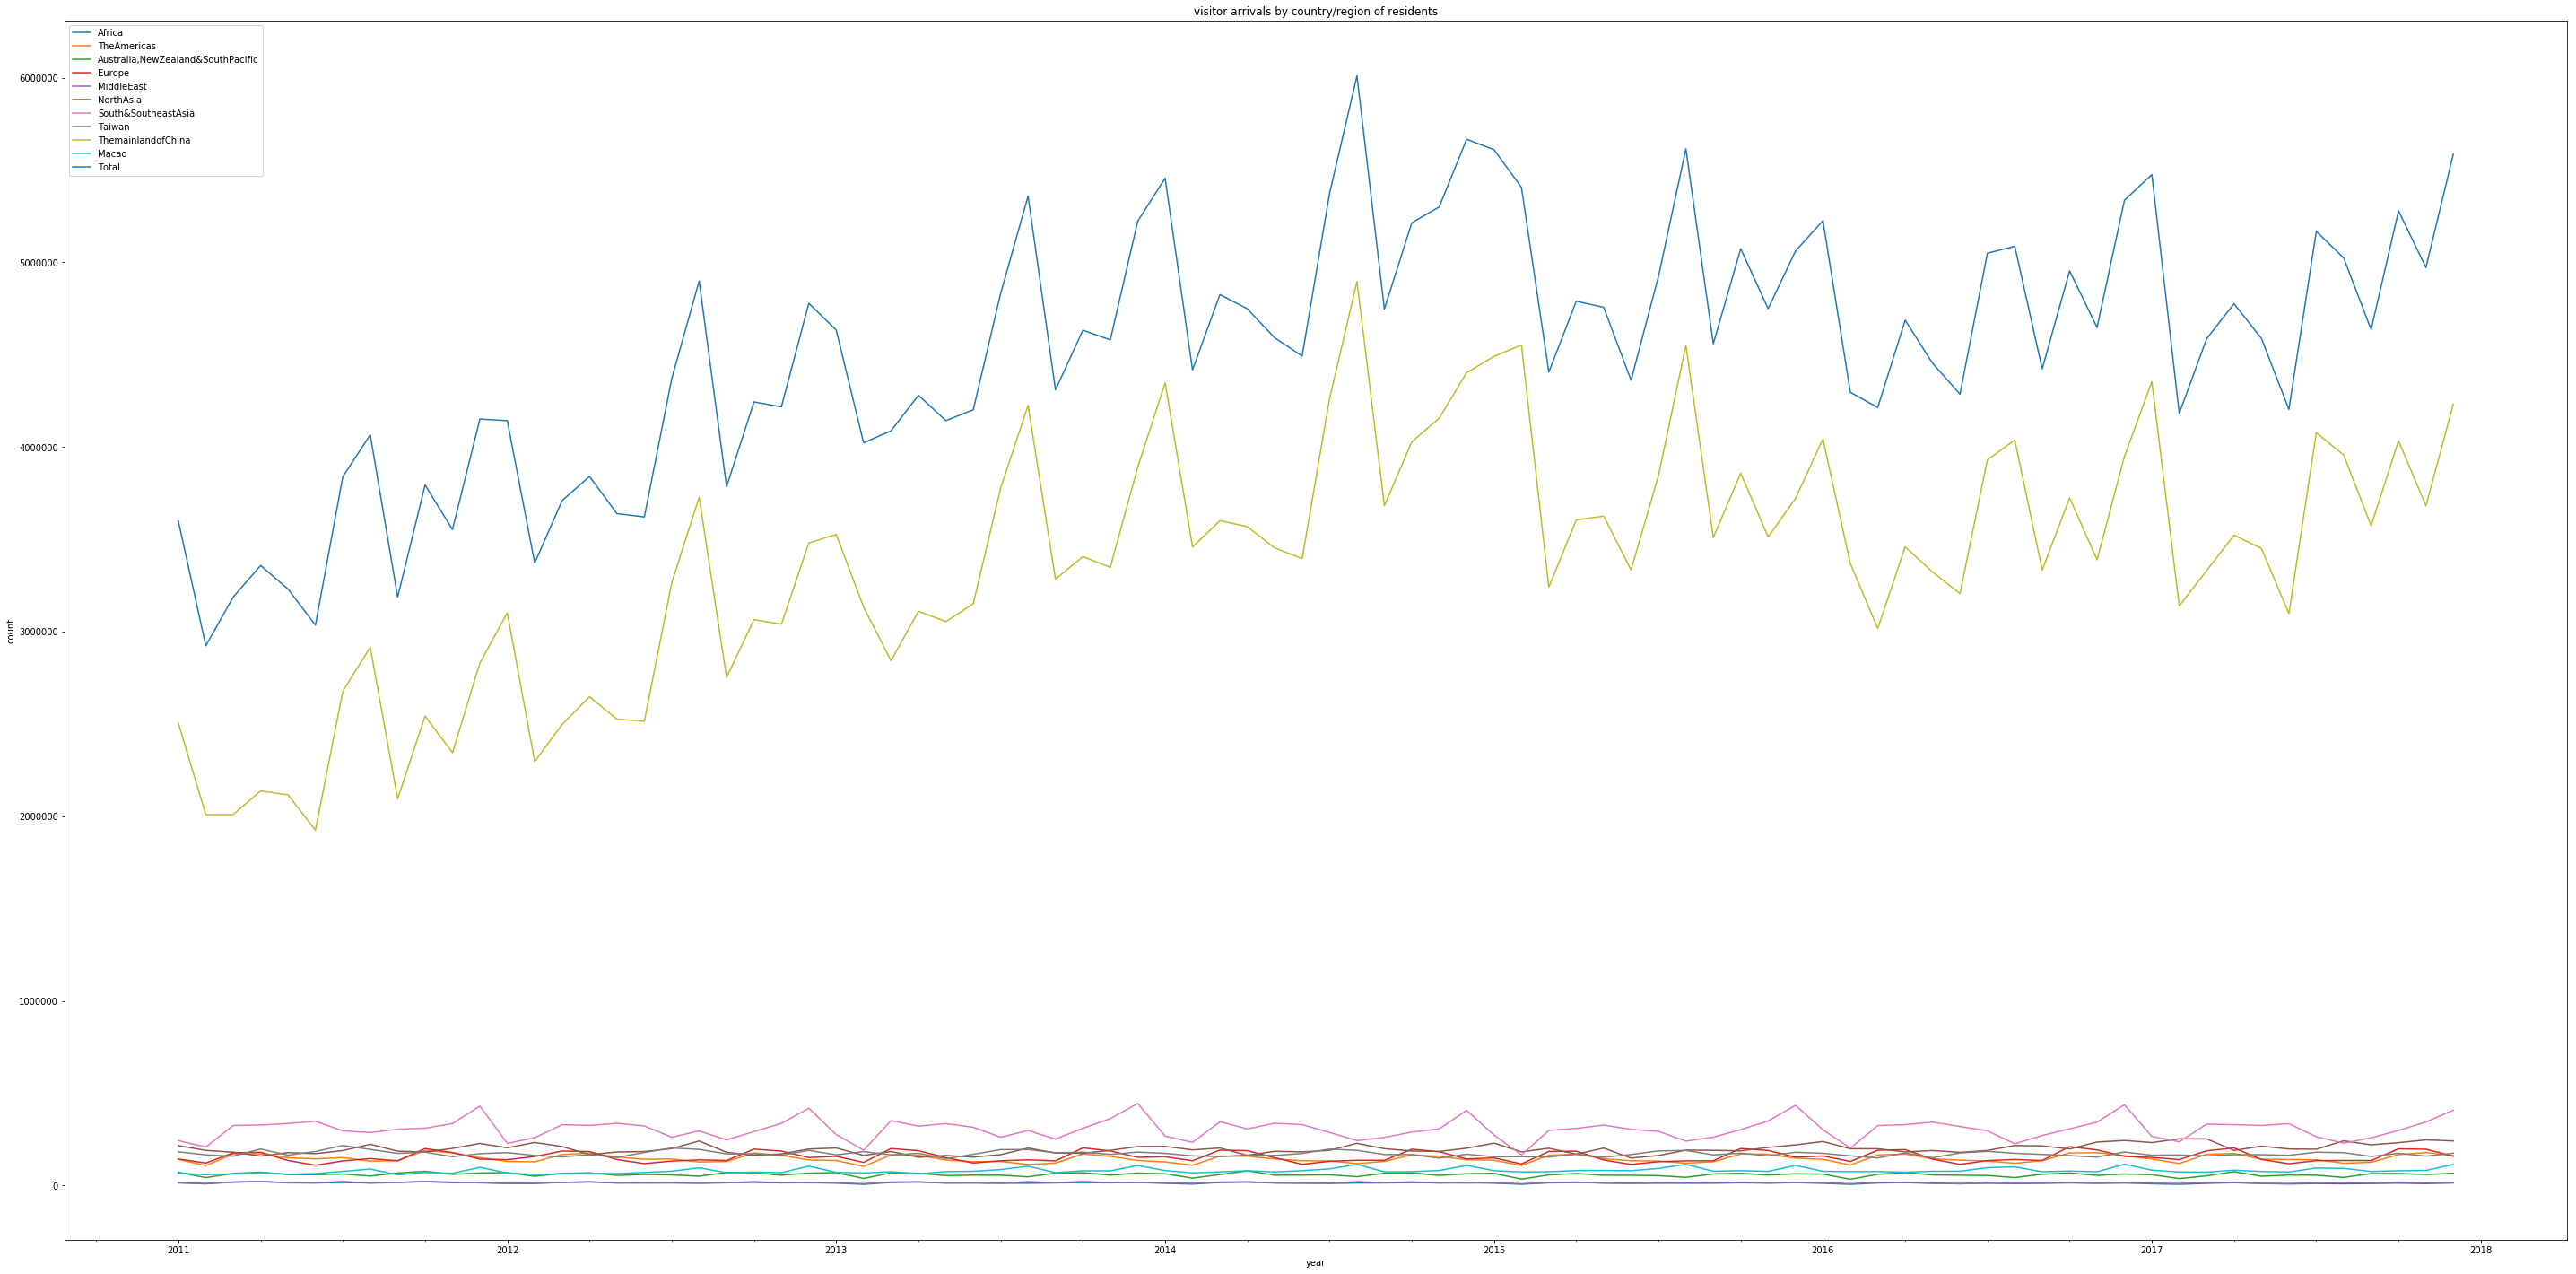

In [33]:
df_all = df.set_index('datetime').resample('1m').aggregate('sum')
df_all.plot(linewidth=1.5, figsize=(50,25))
plt.title('visitor arrivals by country/region of residents')
plt.xlabel('year')
plt.ylabel('count')

Text(0,0.5,'count')

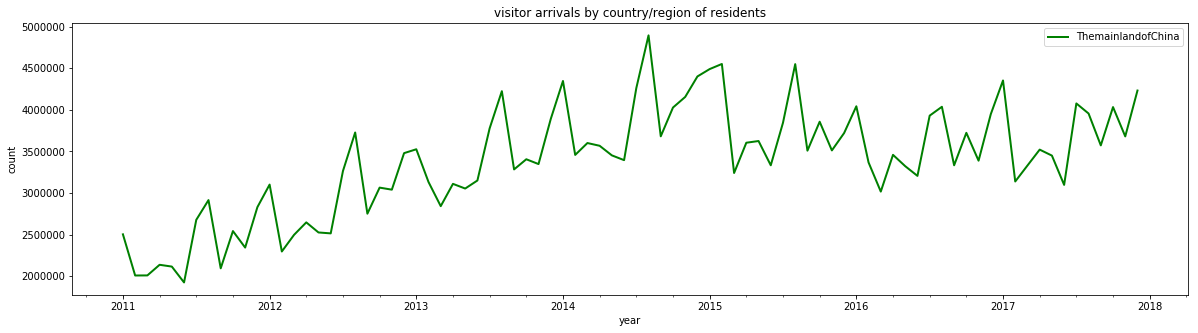

In [35]:
selected_columns = list(set(df_all.columns))
df_all[['ThemainlandofChina']].plot(linewidth=2, figsize=(20,5),color='G').plot()
plt.title('visitor arrivals by country/region of residents')
plt.xlabel('year')
plt.ylabel('count')

Text(0,0.5,'count')

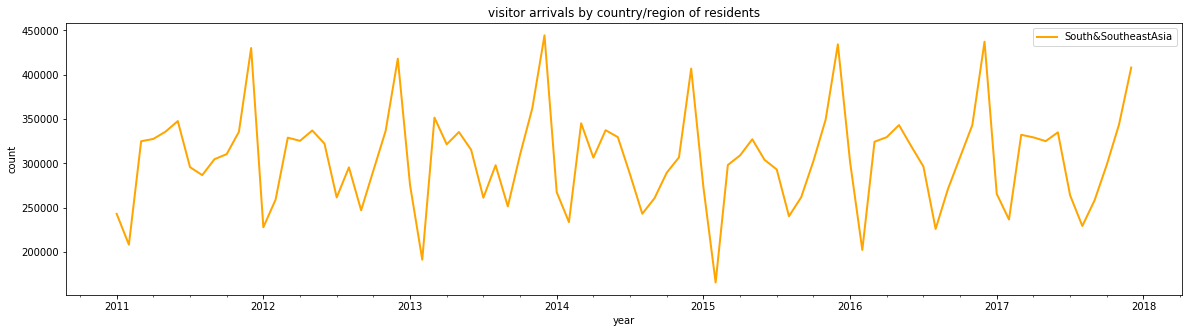

In [36]:
selected_columns = list(set(df_all.columns))
df_all[['South&SoutheastAsia']].plot(linewidth=2, figsize=(20,5),color='Orange').plot()
plt.title('visitor arrivals by country/region of residents')
plt.xlabel('year')
plt.ylabel('count')

Text(0,0.5,'count')

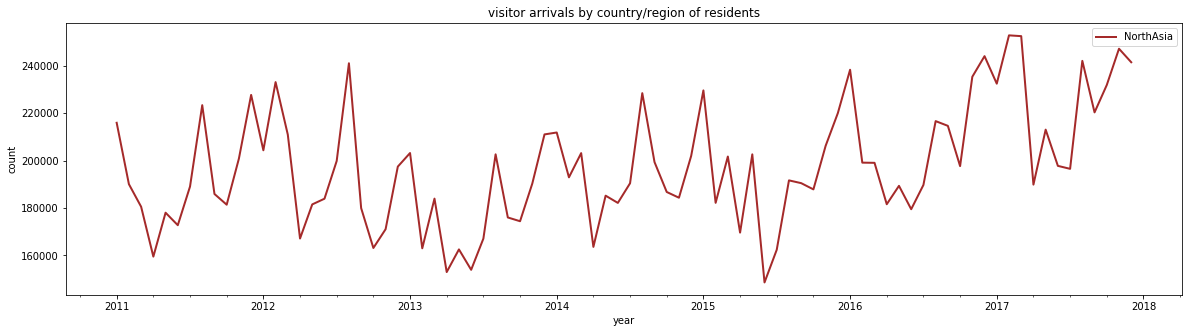

In [38]:
selected_columns = list(set(df_all.columns))
df_all[['NorthAsia']].plot(linewidth=2, figsize=(20,5),color='Brown').plot()
plt.title('visitor arrivals by country/region of residents')
plt.xlabel('year')
plt.ylabel('count')

Text(0,0.5,'count')

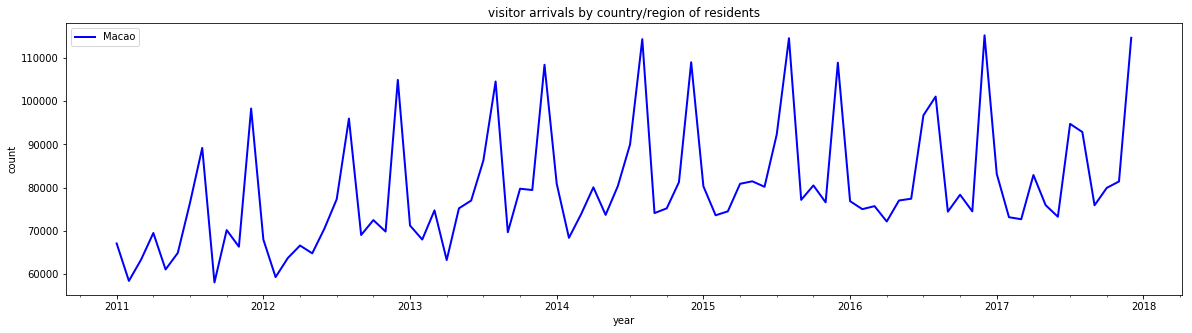

In [39]:
selected_columns = list(set(df_all.columns))
df_all[['Macao']].plot(linewidth=2, figsize=(20,5),color='blue').plot()
plt.title('visitor arrivals by country/region of residents')
plt.xlabel('year')
plt.ylabel('count')

Text(0,0.5,'count')

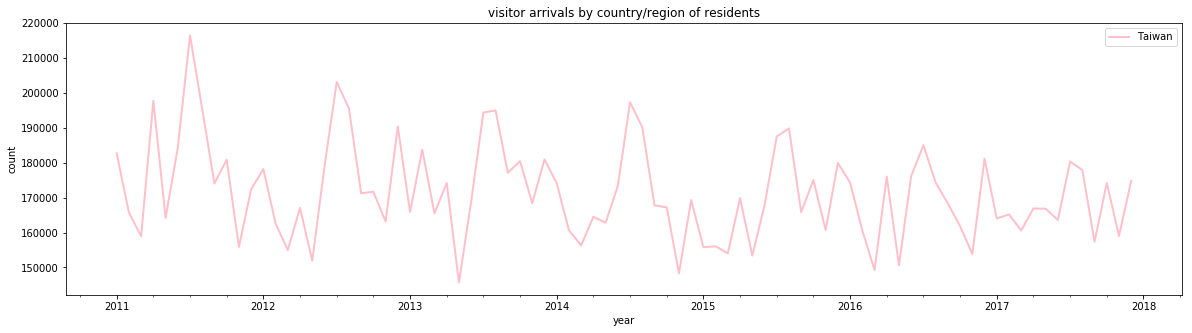

In [41]:
selected_columns = list(set(df_all.columns))
df_all[['Taiwan']].plot(linewidth=2, figsize=(20,5),color='Pink').plot()
plt.title('visitor arrivals by country/region of residents')
plt.xlabel('year')
plt.ylabel('count')

In [10]:
df.head()

,Date,Africa,TheAmericas,"Australia,NewZealand&SouthPacific",Europe,MiddleEast,NorthAsia,South&SoutheastAsia,Taiwan,ThemainlandofChina,Macao,Total,datetime
0,2011-01-01,14470,141504,71946,143205,14927,215919,243083,182703,2503151,67122,3598030,2011-01-01
1,2011-02-01,8914,107691,42858,121715,11177,190027,208270,165779,2008173,58466,2923070,2011-02-01
2,2011-03-01,18778,170788,65442,176988,17926,180496,324999,158922,2009130,63402,3186871,2011-03-01
3,2011-04-01,21341,171679,72112,179957,21580,159448,327629,197775,2136896,69543,3357960,2011-04-01
4,2011-05-01,15733,150615,59579,135314,14217,177978,335874,164192,2115413,61113,3230028,2011-05-01


In [55]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
year = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
month = ['01 January', '02 February', '03 March', '04 April', '05 May', '06 June', '07 July', '08 August', '09 September',
        '10 October', '11 November', '12 December'] 
values = df['ThemainlandofChina']
np.random.seed(100)
arr_year = np.random.choice(year, size=(10000,))
list_year = list(arr_year)

arr_month= np.random.choice(month, size=(10000,))
list_month = list(arr_month)

values = np.random.randint(50, 1000, 10000)
list_values = list(values)

df2 = pd.DataFrame({'year':list_year,
                  'month': list_month,
                  'values':list_values})
df2.head()

,month,values,year
0,03 March,281,2011
1,08 August,759,2011
2,11 November,879,2014
3,02 February,673,2018
4,01 January,987,2018


In [56]:
pt = df2.pivot_table(index='month', columns='year', values='values', aggfunc=np.sum)
pt.head()

year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
01 January,56696,52233,53909,55380,58730,58108,56758,57747
02 February,50123,57850,45952,46448,51079,53916,66838,53645
03 March,58432,47760,52198,52204,57505,57063,63134,61883
04 April,46641,56184,53430,50481,55863,43418,62530,56216
05 May,50772,65368,50983,51034,47671,56488,52055,57957


Text(69,0.5,'month')

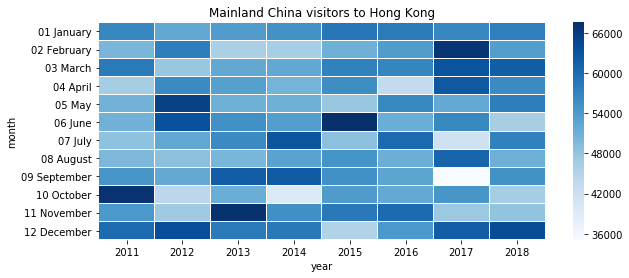

In [57]:
f, ax = plt.subplots(figsize = (10, 4))
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(pt, cmap = 'Blues',  linewidths = 0.05, ax = ax)
ax.set_title('Mainland China visitors to Hong Kong')
ax.set_xlabel('year')
ax.set_ylabel('month')

#f.savefig('sns_heatmap_normal.jpg', bbox_inches='tight')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)